In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cleandata=pd.read_csv('model_data.csv')

In [3]:
cleandata.shape

(38708, 36)

In [4]:
pd.set_option('display.max_columns',150)

In [5]:
cleandata.head()

,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_average,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000,162.87,2,11,24000.0,0,27.65,0,1,3,0,13648,83.7,9,0.0,737.0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,59.83,3,1,30000.0,1,1.00,0,5,3,0,1687,9.4,4,0.0,742.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,84.33,3,11,12252.0,0,8.72,0,2,2,0,2956,98.5,10,0.0,737.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000,339.31,3,11,49200.0,0,20.00,0,1,10,0,5598,21.0,37,0.0,692.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000,67.79,2,2,80000.0,0,17.94,0,0,15,0,27783,53.9,38,0.0,697.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,f1_score
import statsmodels.api as sm
import scipy.stats as stats

## Feature Selection

In [16]:
from statsmodels.tools import add_constant 

In [18]:
import warnings
warnings.filterwarnings('ignore')
finalloan=add_constant(cleandata)
finalloan.head()

,const,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_average,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,1.0,5000,162.87,2,11,24000.0,0,27.65,0,1,3,0,13648,83.7,9,0.0,737.0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2500,59.83,3,1,30000.0,1,1.00,0,5,3,0,1687,9.4,4,0.0,742.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,2400,84.33,3,11,12252.0,0,8.72,0,2,2,0,2956,98.5,10,0.0,737.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.0,10000,339.31,3,11,49200.0,0,20.00,0,1,10,0,5598,21.0,37,0.0,692.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1.0,3000,67.79,2,2,80000.0,0,17.94,0,0,15,0,27783,53.9,38,0.0,697.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [22]:
finalloan=finalloan[['const', 'loan_amnt', 'installment', 'grade', 'emp_length',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'fico_average', 'term_ 60 months',
       'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
       'home_ownership_RENT', 'verification_status_Source Verified',
       'verification_status_Verified', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding','loan_status']]

In [23]:
finalloan.head()

,const,loan_amnt,installment,grade,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,fico_average,term_ 60 months,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,loan_status
0,1.0,5000,162.87,2,11,24000.0,27.65,0,1,3,0,13648,83.7,9,0.0,737.0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2500,59.83,3,1,30000.0,1.00,0,5,3,0,1687,9.4,4,0.0,742.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1.0,2400,84.33,3,11,12252.0,8.72,0,2,2,0,2956,98.5,10,0.0,737.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.0,10000,339.31,3,11,49200.0,20.00,0,1,10,0,5598,21.0,37,0.0,692.0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1.0,3000,67.79,2,2,80000.0,17.94,0,0,15,0,27783,53.9,38,0.0,697.0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [24]:

cols=finalloan.columns[:-1]
model=sm.Logit(cleandata.loan_status,finalloan[cols]).fit()
model.summary()

         Current function value: 0.376453
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                38708
Model:                          Logit   Df Residuals:                    38672
Method:                           MLE   Df Model:                           35
Date:                Thu, 31 Oct 2019   Pseudo R-squ.:                 0.07264
Time:                        13:50:02   Log-Likelihood:                -14572.
converged:                      False   LL-Null:                       -15713.
                                        LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   1.4384      0.656      2.194      0.028       0.154       2.723
loan_amnt                            1.493e-05   7.84e-06      1.905      0.057   -4.33e-07    3.03e-05
installment                         -7.776e-05      0.000     -0.288      0.773      -0.001       0.000
grade                                   0.1299      0.020      6.468      0.000       0.091       0.169
emp_length                              0.0122      0.005      2.689      0.007       0.003       0.021
annual_inc                          -6.556e-06   5.59e-07    -11.728      0.000   -7.65e-06   -5.46e-06
dti                                    -0.0012      0.003     -0.446      0.655      -0.007       0.004
delinq_2yrs                            -0.0162      0.031     -0.529      0.597      -0.076       0.044
inq_last_6mths                          0.1576      0.014     11.390      0.000       0.130       0.185
open_acc                                0.0030      0.005      0.601      0.548      -0.007       0.013
pub_rec                                 0.2361      0.100      2.363      0.018       0.040       0.432
revol_bal                            3.503e-06   1.27e-06      2.769      0.006    1.02e-06    5.98e-06
revol_util                              0.0035      0.001      4.735      0.000       0.002       0.005
total_acc                              -0.0018      0.002     -0.882      0.378      -0.006       0.002
pub_rec_bankruptcies                    0.1042      0.117      0.889      0.374      -0.126       0.334
fico_average                           -0.0060      0.001     -7.060      0.000      -0.008      -0.004
term_ 60 months                         0.6450      0.055     11.761      0.000       0.537       0.752
home_ownership_NONE                   -18.2197   2.07e+04     -0.001      0.999   -4.06e+04    4.06e+04
home_ownership_OTHER                    0.5556      0.271      2.048      0.041       0.024       1.087
home_ownership_OWN                      0.0661      0.062      1.074      0.283      -0.055       0.187
home_ownership_RENT                     0.0940      0.036      2.609      0.009       0.023       0.165
verification_status_Source Verified    -0.0162      0.039     -0.412      0.681      -0.094       0.061
verification_status_Verified           -0.0073      0.040     -0.183      0.855      -0.086       0.071
purpose_credit_card                    -0.0978      0.101     -0.965      0.334      -0.296       0.101
purpose_debt_consolidation              0.1788      0.092      1.946      0.052      -0.001       0.359
purpose_educational                     0.5771      0.179      3.224      0.001       0.226       0.928
purpose_home_improvement                0.1787      0.107      1.669      0.095      -0.031       0.389
purpose_house                           0.3365      0.172      1.956      0.050      -0.001       0.674
purpose_major_pur

## Backward Selection Pvalue approach

In [25]:
def back_feat_elm(dataframe,dep_var,col_list):
    while len(col_list)>0:
        model=sm.Logit(dep_var,dataframe[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if (largest_pvalue[0])<0.05:
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)
            

result=back_feat_elm(finalloan,cleandata.loan_status,cols)
        

In [27]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                38708
Model:                          Logit   Df Residuals:                    38685
Method:                           MLE   Df Model:                           22
Date:                Thu, 31 Oct 2019   Pseudo R-squ.:                 0.07242
Time:                        13:53:10   Log-Likelihood:                -14575.
converged:                       True   LL-Null:                       -15713.
                                        LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          1.2506      0.613      2.041      0.041       0.049       2.452
loan_amnt                   1.188e-05   2.69e-06      4.409      0.000     6.6e-06    1.72e-05
grade                          0.1327      0.019      6.871      0.000       0.095       0.170
emp_length                     0.0115      0.004      2.558      0.011       0.003       0.020
annual_inc                 -6.651e-06   5.24e-07    -12.691      0.000   -7.68e-06   -5.62e-06
inq_last_6mths                 0.1563      0.014     11.392      0.000       0.129       0.183
pub_rec                        0.3101      0.056      5.543      0.000       0.200       0.420
revol_bal                   3.282e-06   1.21e-06      2.713      0.007    9.11e-07    5.65e-06
revol_util                     0.0034      0.001      4.949      0.000       0.002       0.005
fico_average                  -0.0058      0.001     -7.161      0.000      -0.007      -0.004
term_ 60 months                0.6513      0.039     16.587      0.000       0.574       0.728
home_ownership_OTHER           0.5443      0.271      2.009      0.044       0.013       1.075
home_ownership_RENT            0.0842      0.034      2.510      0.012       0.018       0.150
purpose_debt_consolidation     0.2351      0.041      5.694      0.000       0.154       0.316
purpose_educational            0.6361      0.160      3.987      0.000       0.323       0.949
purpose_home_improvement       0.2317      0.071      3.260      0.001       0.092       0.371
purpose_house                  0.3945      0.152      2.598      0.009       0.097       0.692
purpose_medical                0.4410      0.117      3.769      0.000       0.212       0.670
purpose_moving                 0.4820      0.127      3.792      0.000       0.233       0.731
purpose_other                  0.4838      0.058      8.388      0.000       0.371       0.597
purpose_renewable_energy       0.7965      0.275      2.897      0.004       0.258       1.335
purpose_small_business         1.0531      0.068     15.600      0.000       0.921       1.185
purpose_vacation               0.4821      0.161      2.991      0.003       0.166       0.798
==============================================================================================
"""

# Odds ratios,CI and pvalues

In [28]:
params=np.exp(result.params)
conf=np.exp(result.conf_int())
conf['OR']=params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns=['CI 95%(2.5%)', 'CI 97.5%', 'Odds Ratio','pvalue']
print(conf)

                            CI 95%(2.5%)   CI 97.5%  Odds Ratio  pvalue
const                           1.050695  11.608434    3.492409   0.041
loan_amnt                       1.000007   1.000017    1.000012   0.000
grade                           1.099456   1.185889    1.141855   0.000
emp_length                      1.002686   1.020483    1.011546   0.011
annual_inc                      0.999992   0.999994    0.999993   0.000
inq_last_6mths                  1.138160   1.201054    1.169185   0.000
pub_rec                         1.221922   1.521494    1.363506   0.000
revol_bal                       1.000001   1.000006    1.000003   0.007
revol_util                      1.002045   1.004733    1.003388   0.000
fico_average                    0.992632   0.995792    0.994211   0.000
term_ 60 months                 1.775944   2.071440    1.918009   0.000
home_ownership_OTHER            1.013494   2.930679    1.723434   0.044
home_ownership_RENT             1.018616   1.161703    1.087810 

In [30]:
new_features=cleandata[['loan_amnt','grade','emp_length','annual_inc','inq_last_6mths','pub_rec','revol_bal','revol_util','fico_average','term_ 60 months','home_ownership_OTHER','home_ownership_RENT','purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_house','purpose_medical','purpose_moving','purpose_other','purpose_renewable_energy','purpose_small_business','purpose_vacation']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
training_features, test_features,training_target, test_target,=train_test_split(x,y,test_size=.20,random_state=5)

In [31]:
x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,test_size = .20,random_state=5)

# SMOTE

In [32]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [33]:
 dd=pd.Series(y_train_res)

In [34]:
dd.value_counts()

1    24559
0    24559
dtype: int64

In [36]:
logreg=LogisticRegression()
logreg.fit(x_train_res, y_train_res)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
print('Validation Results')
print( logreg.score(x_val, y_val))
print(recall_score(y_val, logreg.predict(x_val)))
print( '\nTest Results')
print( logreg.score(test_features, test_target))
print( recall_score(test_target, logreg.predict(test_features)))

Validation Results
0.8083629318695512
0.9841269841269841

Test Results
0.8027641436321364
0.8947368421052632


In [39]:
confusion_matrix(test_target,logreg.predict(test_features))

array([[6147, 1519],
       [   8,   68]], dtype=int64)

In [40]:
accuracy_score(test_target,logreg.predict(test_features))

0.8027641436321364

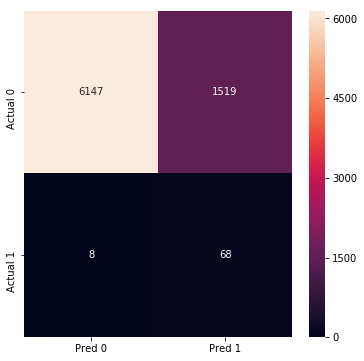

In [42]:
cm=confusion_matrix(test_target,logreg.predict(test_features))
cc=pd.DataFrame(cm,columns=['Pred 0','Pred 1'],index=['Actual 0','Actual 1'])
plt.figure(figsize=(6,6))
sns.heatmap(cc,annot=True,fmt='d');

In [43]:
pred_prob=logreg.predict_proba(test_features)[:,:]
pred_prob_df=pd.DataFrame(data=pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.945189,0.054811
1,0.988718,0.011282
2,0.991550,0.008450
3,0.952255,0.047745
4,0.983330,0.016670


# Threshold 

In [44]:
from sklearn.preprocessing import binarize

In [47]:
for i in range(1,10):
    cm2=0
    pred_prob_yes=logreg.predict_proba(test_features)
    pred2=binarize(pred_prob_yes,i/10)[:,1]
    cm2=confusion_matrix(test_target,pred2)
    print ('With',i/10,'threshold the Confusion Matrix is ','\n',cm2,'\n',
        'with',cm2[0,0]+cm2[1,1],'correct predictions and',cm2[1,0],'Type II errors( False Negatives)','\n\n',
      'Sensitivity: ',cm2[1,1]/(float(cm2[1,1]+cm2[1,0])),'Specificity: ',cm2[0,0]/(float(cm2[0,0]+cm2[0,1])),'\n\n\n')

With 0.1 threshold the Confusion Matrix is  
 [[5162 2504]
 [   0   76]] 
 with 5238 correct predictions and 0 Type II errors( False Negatives) 

 Sensitivity:  1.0 Specificity:  0.6733629011218367 



With 0.2 threshold the Confusion Matrix is  
 [[5508 2158]
 [   3   73]] 
 with 5581 correct predictions and 3 Type II errors( False Negatives) 

 Sensitivity:  0.9605263157894737 Specificity:  0.7184972606313592 



With 0.3 threshold the Confusion Matrix is  
 [[5702 1964]
 [   3   73]] 
 with 5775 correct predictions and 3 Type II errors( False Negatives) 

 Sensitivity:  0.9605263157894737 Specificity:  0.7438038090268719 



With 0.4 threshold the Confusion Matrix is  
 [[5915 1751]
 [   5   71]] 
 with 5986 correct predictions and 5 Type II errors( False Negatives) 

 Sensitivity:  0.9342105263157895 Specificity:  0.7715888338116358 



With 0.5 threshold the Confusion Matrix is  
 [[6147 1519]
 [   8   68]] 
 with 6215 correct predictions and 8 Type II errors( False Negatives) 

 

# ROC curve

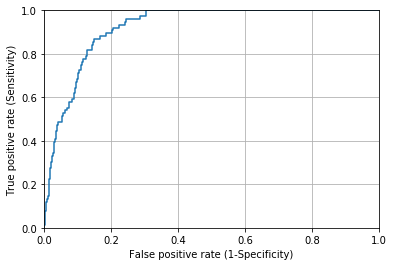

In [46]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_target, pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [48]:
roc_auc_score(test_target,pred_prob_yes[:,1])

0.9212156892361351